## Brian Makumi
### 18s01acs025
### Artificial Intelligence
### Term Project

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Twitter API Credentials

In [2]:
consumer_key= "E5fzBzFf87iK4drDlgfpDbOVr"    
consumer_secret= "7VAz5DnMvwHuv8l8TlYIPmQOaCucKIo4k2OusMVx2lSo8xPjCj"
access_token= "1320999112280399875-5j0y9GjQj3QCQBLvveYLu2SASZeKD1"    
access_token_secret= "d8GoooR58qHo13p0L6QwMg9hvhgvKd8DuL1iIDnE6rl0G"

#### Authentication Object and Access Tokens

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

#### Extract 200 tweets from amazon's twitter account
#### Print The Last 5 tweets from the account

In [4]:
posts = api.user_timeline(screen_name="amazon", count= 200, lang="en", tweet_mode="extended")

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) Dreading organizing that closet? 😒 

Don’t worry: Amazon has everything you need to spring into action 🧦🧹👡

2) @Consuelachacha Please keep us in the loop if you have any issues with future orders, so that we can provide assistance! (2/2) -Justin

3) @Consuelachacha We understand your concern! For security purposes, we don't have account access via social media, but we'd still like to help! When you have a moment, please reach out to the carriers with the contact information that they provide here: https://t.co/bJq94poT2S. (1/2)

4) @Consuelachacha This isn't the level of service we intend to provide! To ensure the best help possible, have you noticed a trend with a specific carrier when packages are delayed? If unsure, you can view the carrier in the tracking here: https://t.co/ZSPza0hJR9. -Justin

5) @Consuelachacha Hello! There are many factors that can impact processing times, such as local availability and location. You can read more here: https://t.c

#### Creating a  dataframe with a column called Tweets and Showing the first 5 rows of the data

In [5]:
dframe = pd.DataFrame ( [tweet.full_text for tweet in posts], columns=['Tweets'])

dframe.head()

,Tweets
0,Dreading organizing that closet? 😒 \n\nDon’t w...
1,@Consuelachacha Please keep us in the loop if ...
2,@Consuelachacha We understand your concern! Fo...
3,@Consuelachacha This isn't the level of servic...
4,@Consuelachacha Hello! There are many factors ...


#### Cleaning the text

In [6]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removing @mentions
    text = re.sub(r'#','', text) #Removing the # symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing the Hyper Link
    
    return text

dframe['Tweets'] = dframe['Tweets'].apply(cleanTxt)
dframe

,Tweets
0,Dreading organizing that closet? 😒 \n\nDon’t w...
1,Please keep us in the loop if you have any is...
2,We understand your concern! For security purp...
3,This isn't the level of service we intend to ...
4,Hello! There are many factors that can impact...
...,...
195,You're most welcome! 😊 Happy reading! 📚
196,"We don't know what kind of party this is, but..."
197,"_Mime *Fingers in ears* La, la, la! We can't h..."
198,_g Having the right gear is key! 😄 🔑 Have a gr...


#### Creating a function to get the subjectivity and polarity

In [7]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

dframe['Subjectivity'] = dframe['Tweets'].apply(getSubjectivity)
dframe['Polarity'] = dframe['Tweets'].apply(getPolarity)

dframe

,Tweets,Subjectivity,Polarity
0,Dreading organizing that closet? 😒 \n\nDon’t w...,0.100000,0.100000
1,Please keep us in the loop if you have any is...,0.125000,0.000000
2,We understand your concern! For security purp...,0.533333,-0.354167
3,This isn't the level of service we intend to ...,0.475000,0.333333
4,Hello! There are many factors that can impact...,0.380000,0.180000
...,...,...,...
195,You're most welcome! 😊 Happy reading! 📚,0.800000,0.833333
196,"We don't know what kind of party this is, but...",0.566667,0.625521
197,"_Mime *Fingers in ears* La, la, la! We can't h...",0.600000,-0.400000
198,_g Having the right gear is key! 😄 🔑 Have a gr...,0.761905,0.428571


#### Ploting the wordcloud

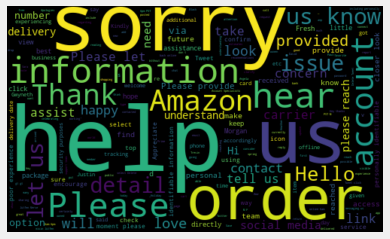

In [8]:
allWords = ' '.join([twts for twts in dframe['Tweets']])
wordCloud = WordCloud(width= 500, height= 300,  random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

#### Creating a function to Compute the negative, neutral and positive analysis

In [9]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
dframe['Analysis'] = dframe['Polarity'].apply(getAnalysis)

dframe

,Tweets,Subjectivity,Polarity,Analysis
0,Dreading organizing that closet? 😒 \n\nDon’t w...,0.100000,0.100000,Positive
1,Please keep us in the loop if you have any is...,0.125000,0.000000,Neutral
2,We understand your concern! For security purp...,0.533333,-0.354167,Negative
3,This isn't the level of service we intend to ...,0.475000,0.333333,Positive
4,Hello! There are many factors that can impact...,0.380000,0.180000,Positive
...,...,...,...,...
195,You're most welcome! 😊 Happy reading! 📚,0.800000,0.833333,Positive
196,"We don't know what kind of party this is, but...",0.566667,0.625521,Positive
197,"_Mime *Fingers in ears* La, la, la! We can't h...",0.600000,-0.400000,Negative
198,_g Having the right gear is key! 😄 🔑 Have a gr...,0.761905,0.428571,Positive


#### Print all of the positive tweets

In [10]:
j=1
sortedDFrame = dframe.sort_values(by=['Polarity'])
for i in range(0, sortedDFrame.shape[0]):
    if(sortedDFrame['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDFrame['Tweets'][i])
        print()
        j = j + 1

1) Dreading organizing that closet? 😒 

Don’t worry: Amazon has everything you need to spring into action 🧦🧹👡

2)  This isn't the level of service we intend to provide! To ensure the best help possible, have you noticed a trend with a specific carrier when packages are delayed? If unsure, you can view the carrier in the tracking here:  -Justin

3)  Hello! There are many factors that can impact processing times, such as local availability and location. You can read more here:  Did we miss the expected delivery date provided when an order was placed? -Justin

4)  You're welcome. We hope you have a wonderful rest of your day! -James

5)  Hello, thank you very much for bringing this to attention. We would like to escalate this accordingly. Can you please confirm what city you saw this in? -Morgan

6)  We don't have access to accounts here on social, but please reach out to us here:  to allow us to look into this for you. -Morgan

7) Remember: Wishes can indeed come true... especially when 

#### Print The Negative Tweets

In [11]:
j=1
sortedDFrame = dframe.sort_values(by=['Polarity'])
for i in range(0, sortedDFrame.shape[0]):
    if(sortedDFrame['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDFrame['Tweets'][i])
        print()
        j = j+1

1)  We understand your concern! For security purposes, we don't have account access via social media, but we'd still like to help! When you have a moment, please reach out to the carriers with the contact information that they provide here:  (1/2)

2)  The Skip login link we provided you earlier. Once you have accessed this link please select the drop down option that says 'My password isn't working' and call us on the number provided. -Morgan

3)  This is dependent on the investigation timeframe, and down to the Account Specialists discretion. Please contact us on the link above at your nearest convenience. -Morgan

4)  Please select the drop down option that says 'My password isn't working' and call us on the number provided. -Morgan

5)  We understand you're unhappy with the longer estimates provided for the order. Orders are dispatched and delivered as per the given estimates. Hence, we request you to wait till the estimated delivery date of your order. 
-Pooja

6) _class_badger We

#### Plotting the Polarity and Subjectivity 

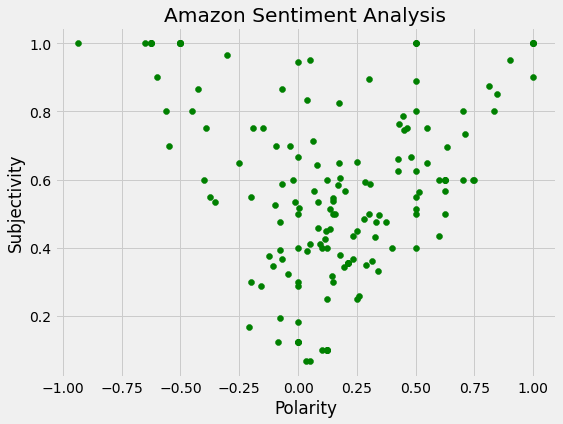

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, dframe.shape[0]):
    plt.scatter(dframe['Polarity'][i], dframe['Subjectivity'][i], color='Green')
    
plt.title('Amazon Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#### Get The Percentages of Positive Tweets

In [13]:
ptweets = dframe[dframe.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / dframe.shape[0]) * 100, 1)

53.5

#### Get Percentage of Negative Tweets

In [14]:
ntweets = dframe[dframe.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round ( (ntweets.shape[0] / dframe.shape[0]) * 100, 1)

23.0

#### Show the Value Counts

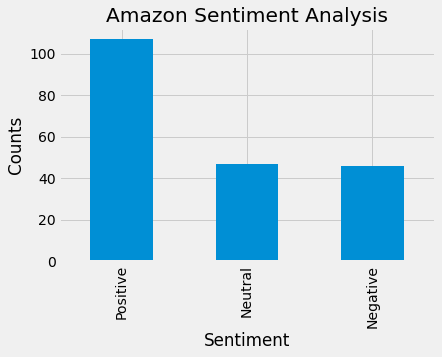

In [15]:
dframe['Analysis'].value_counts()

plt.title('Amazon Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dframe['Analysis'].value_counts().plot(kind='bar')
plt.show()
